# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


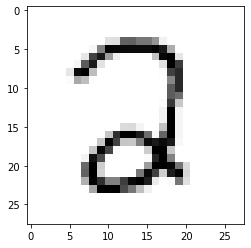

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.2510269968585367
train accuracy is: 0.6397930228676347, test accuracy is 0.6159274193548387


Epoch 10 Loss 0.08760394087484122
train accuracy is: 0.9204640293773995, test accuracy is 0.9243951612903226


Epoch 20 Loss 0.05430286107973056
train accuracy is: 0.943164747120681, test accuracy is 0.9465725806451613


Epoch 30 Loss 0.042767218556272704
train accuracy is: 0.9547654815556669, test accuracy is 0.9576612903225806


Epoch 40 Loss 0.03690621201306705
train accuracy is: 0.9601902854281422, test accuracy is 0.9616935483870968


Epoch 50 Loss 0.03330597133049416
train accuracy is: 0.9636955433149724, test accuracy is 0.9657258064516129


Epoch 60 Loss 0.0308012926917674
train accuracy is: 0.9654481722583875, test accuracy is 0.967741935483871


Epoch 70 Loss 0.028911141419055125
train accuracy is: 0.9682857619762978, test accuracy is 0.969758064516129


Epoch 80 Loss 0.027404813210178892
train accuracy is: 0.9694541812719079, test accuracy is 0.9692540322580645


Epoch 90 Loss 0.026145466557275364
train accuracy is: 0.9707060590886329, test accuracy is 0.9707661290322581


Epoch 100 Loss 0.025084070792914078
train accuracy is: 0.971540644299783, test accuracy is 0.9712701612903226


Epoch 110 Loss 0.024153018936690147
train accuracy is: 0.972041395426473, test accuracy is 0.9712701612903226


Epoch 120 Loss 0.0233352353172189
train accuracy is: 0.9736271073276581, test accuracy is 0.9707661290322581


Epoch 130 Loss 0.022595557650777677
train accuracy is: 0.9745451510599232, test accuracy is 0.9712701612903226


Epoch 140 Loss 0.021916726514213804
train accuracy is: 0.9758804873977633, test accuracy is 0.9727822580645161


Epoch 150 Loss 0.021296001939074872
train accuracy is: 0.9762143214822233, test accuracy is 0.9737903225806451


Epoch 160 Loss 0.020713298045519506
train accuracy is: 0.9770489066933734, test accuracy is 0.9737903225806451


Epoch 170 Loss 0.020169483194153216
train accuracy is: 0.9777165748622935, test accuracy is 0.9742943548387096


Epoch 180 Loss 0.019660676974919307
train accuracy is: 0.9781338674678685, test accuracy is 0.9747983870967742


Epoch 190 Loss 0.019172812155391888
train accuracy is: 0.9785511600734434, test accuracy is 0.9753024193548387


Epoch 200 Loss 0.018712725888864492
train accuracy is: 0.9788849941579035, test accuracy is 0.9753024193548387


Epoch 210 Loss 0.01827339934269999
train accuracy is: 0.9793022867634785, test accuracy is 0.9763104838709677


Epoch 220 Loss 0.017848354154126896
train accuracy is: 0.9795526623268236, test accuracy is 0.9768145161290323


Epoch 230 Loss 0.017446620325790634
train accuracy is: 0.9802203304957436, test accuracy is 0.9768145161290323


Epoch 240 Loss 0.017050756639451364
train accuracy is: 0.9809714571857787, test accuracy is 0.9773185483870968


0.004436746770288873

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.24598719681077674
train accuracy is: 0.6884493406776832, test accuracy is 0.7011088709677419


Epoch 10 Loss 0.1004852677271786
train accuracy is: 0.9177933567017192, test accuracy is 0.9339717741935484


Epoch 20 Loss 0.07732357746193341
train accuracy is: 0.9319813052912702, test accuracy is 0.9435483870967742


Epoch 30 Loss 0.06687523601393303
train accuracy is: 0.9393256551493907, test accuracy is 0.9511088709677419


Epoch 40 Loss 0.06060808603485526
train accuracy is: 0.943748956768486, test accuracy is 0.953125


Epoch 50 Loss 0.05632515957410576
train accuracy is: 0.9465030879652813, test accuracy is 0.9546370967741935


Epoch 60 Loss 0.05316536540546856
train accuracy is: 0.9486730095142714, test accuracy is 0.9561491935483871


Epoch 70 Loss 0.05071483859547775
train accuracy is: 0.9502587214154565, test accuracy is 0.9571572580645161


Epoch 80 Loss 0.048741585123348107
train accuracy is: 0.9512602236688366, test accuracy is 0.9591733870967742


Epoch 90 Loss 0.047109248621920265
train accuracy is: 0.9525121014855616, test accuracy is 0.9601814516129032


Epoch 100 Loss 0.045731779637241385
train accuracy is: 0.9532632281755967, test accuracy is 0.9596774193548387


Epoch 110 Loss 0.044546328846088175
train accuracy is: 0.9539308963445168, test accuracy is 0.9606854838709677


Epoch 120 Loss 0.04351284912574272
train accuracy is: 0.9550158571190118, test accuracy is 0.9616935483870968


Epoch 130 Loss 0.042601703609913874
train accuracy is: 0.9554331497245869, test accuracy is 0.9621975806451613


Epoch 140 Loss 0.04178976907553809
train accuracy is: 0.9559339008512769, test accuracy is 0.9632056451612904


Epoch 150 Loss 0.04106054992176319
train accuracy is: 0.956518110499082, test accuracy is 0.9637096774193549


Epoch 160 Loss 0.04039969883760578
train accuracy is: 0.957185778668002, test accuracy is 0.9637096774193549


Epoch 170 Loss 0.03979811729181079
train accuracy is: 0.9577699883158071, test accuracy is 0.9627016129032258


Epoch 180 Loss 0.039247657116659965
train accuracy is: 0.9583541979636121, test accuracy is 0.9627016129032258


Epoch 190 Loss 0.038740276004102826
train accuracy is: 0.9586880320480721, test accuracy is 0.9632056451612904


Epoch 200 Loss 0.0382704790029969
train accuracy is: 0.9590218661325322, test accuracy is 0.9632056451612904


Epoch 210 Loss 0.03783421997583393
train accuracy is: 0.9593557002169921, test accuracy is 0.9627016129032258


Epoch 220 Loss 0.03742782686777132
train accuracy is: 0.9599399098647972, test accuracy is 0.9632056451612904


Epoch 230 Loss 0.03704822258328033
train accuracy is: 0.9605241195126022, test accuracy is 0.9642137096774194


Epoch 240 Loss 0.03669140116321293
train accuracy is: 0.9606910365548322, test accuracy is 0.9637096774193549


0.03479481492766162

### Comparing results of NN and LR

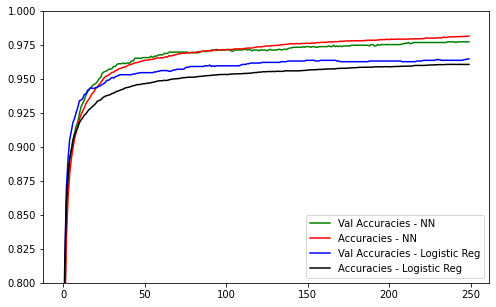

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

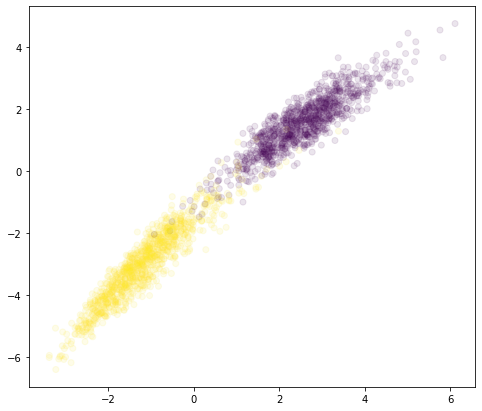

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

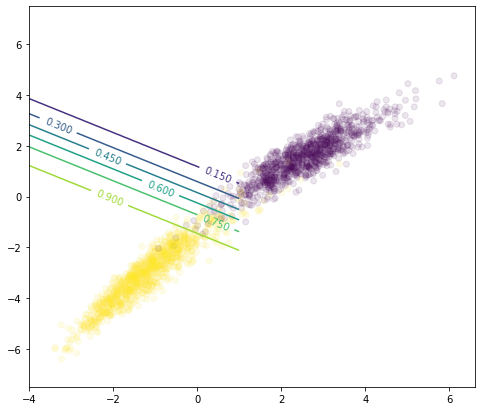

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );